# Activity: Build a random forest model

## **Introduction**


As you're learning, random forests are popular statistical learning algorithms. Some of their primary benefits include reducing variance, bias, and the chance of overfitting.

This activity is a continuation of the project you began modeling with decision trees for an airline. Here, you will train, tune, and evaluate a random forest model using data from spreadsheet of survey responses from 129,880 customers. It includes data points such as class, flight distance, and inflight entertainment. Your random forest model will be used to predict whether a customer will be satisfied with their flight experience.

**Note:** Because this lab uses a real dataset, this notebook first requires exploratory data analysis, data cleaning, and other manipulations to prepare it for modeling.

## **Step 1: Imports** 


Import relevant Python libraries and modules, including `numpy` and `pandas`libraries for data processing; the `pickle` package to save the model; and the `sklearn` library, containing:
- The module `ensemble`, which has the function `RandomForestClassifier`
- The module `model_selection`, which has the functions `train_test_split`, `PredefinedSplit`, and `GridSearchCV` 
- The module `metrics`, which has the functions `f1_score`, `precision_score`, `recall_score`, and `accuracy_score`


In [1]:
# Import `numpy`, `pandas`, `pickle`, and `sklearn`.
# Import the relevant functions from `sklearn.ensemble`, `sklearn.model_selection`, and `sklearn.metrics`.

### YOUR CODE HERE ###

# operational
import numpy as np
import pandas as pd

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# others
import pickle as pkl

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###

air_data = pd.read_csv(r"C:\Users\Levi\Desktop\Data Analyst\Datasets\Invistico_Airline.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

The `read_csv()` function from the `pandas` library can be helpful here.
 
</details>

Now, you're ready to begin cleaning your data. 

## **Step 2: Data cleaning** 

To get a sense of the data, display the first 10 rows.

In [3]:
# Display first 10 rows.

### YOUR CODE HERE ###
air_data.head(10)


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

The `head()` function from the `pandas` library can be helpful here.
 
</details>

Now, display the variable names and their data types. 

In [4]:
# Display variable names and types.

### YOUR CODE HERE ###
air_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

DataFrames have an attribute that outputs variable names and data types in one result.
 
</details>

**Question:** What do you observe about the differences in data types among the variables included in the data?

There are 4 objects: namely satisfaction, customer type, type of travel and class. The rest are numeric int64 or float64.

Next, to understand the size of the dataset, identify the number of rows and the number of columns.

In [5]:
# Identify the number of rows and the number of columns.

### YOUR CODE HERE ###
air_data.shape


(129880, 22)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

There is a method in the `pandas` library that outputs the number of rows and the number of columns in one result.

</details>

Now, check for missing values in the rows of the data. Start with .isna() to get Booleans indicating whether each value in the data is missing. Then, use .any(axis=1) to get Booleans indicating whether there are any missing values along the columns in each row. Finally, use .sum() to get the number of rows that contain missing values.

In [7]:
# Get Booleans to find missing values in data.
# Get Booleans to find missing values along columns.
# Get the number of rows that contain missing values.

### YOUR CODE HERE ###

print(air_data.isna().any(axis=1).sum())
print(air_data.isna().sum())


393
satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


**Question:** How many rows of data are missing values?**

Only 1 row, arrival delay in minutes.

Drop the rows with missing values. This is an important step in data cleaning, as it makes the data more useful for analysis and regression. Then, save the resulting pandas DataFrame in a variable named `air_data_subset`.

In [9]:
# Drop missing values.
# Save the DataFrame in variable `air_data_subset`.

### YOUR CODE HERE ###
air_data_subset = air_data.dropna(axis=0)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

The `dropna()` function is helpful here.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The axis parameter passed in to this function should be set to 0 (if you want to drop rows containing missing values) or 1 (if you want to drop columns containing missing values).
</details>

Next, display the first 10 rows to examine the data subset.

In [10]:
# Display the first 10 rows.

### YOUR CODE HERE ###
air_data_subset.head(10)


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Confirm that it does not contain any missing values.

In [11]:
# Count of missing values.

### YOUR CODE HERE ###
air_data_subset.isna().sum()


satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can use the `.isna().sum()` to get the number of missing values for each variable.

</details>

Next, convert the categorical features to indicator (one-hot encoded) features. 

**Note:** The `drop_first` argument can be kept as default (`False`) during one-hot encoding for random forest models, so it does not need to be specified. Also, the target variable, `satisfaction`, does not need to be encoded and will be extracted in a later step.

In [12]:
# Convert categorical features to one-hot encoded features.

### YOUR CODE HERE ###
air_data_subset_dummies = pd.get_dummies(air_data_subset, 
                                        columns=['Customer Type', 'Type of Travel', 'Class'])

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can use the `pd.get_dummies()` function to convert categorical variables to one-hot encoded variables.
</details>

**Question:** Why is it necessary to convert categorical data into dummy variables?**

Converting categorical to numerical allows us to use these values for our Machine Learning models.

Next, display the first 10 rows to review the `air_data_subset_dummies`. 

In [13]:
# Display the first 10 rows.

### YOUR CODE HERE ###
air_data_subset_dummies.head(10)


,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,65,265,0,0,0,2,2,4,2,...,2,0,0.0,1,0,0,1,0,1,0
1,satisfied,47,2464,0,0,0,3,0,2,2,...,2,310,305.0,1,0,0,1,1,0,0
2,satisfied,15,2138,0,0,0,3,2,0,2,...,2,0,0.0,1,0,0,1,0,1,0
3,satisfied,60,623,0,0,0,3,3,4,3,...,3,0,0.0,1,0,0,1,0,1,0
4,satisfied,70,354,0,0,0,3,4,3,4,...,5,0,0.0,1,0,0,1,0,1,0
5,satisfied,30,1894,0,0,0,3,2,0,2,...,2,0,0.0,1,0,0,1,0,1,0
6,satisfied,66,227,0,0,0,3,2,5,5,...,3,17,15.0,1,0,0,1,0,1,0
7,satisfied,10,1812,0,0,0,3,2,0,2,...,2,0,0.0,1,0,0,1,0,1,0
8,satisfied,56,73,0,0,0,3,5,3,5,...,4,0,0.0,1,0,0,1,1,0,0
9,satisfied,22,1556,0,0,0,3,2,0,2,...,2,30,26.0,1,0,0,1,0,1,0


Then, check the variables of air_data_subset_dummies.

In [14]:
# Display variables.

### YOUR CODE HERE ###
air_data_subset_dummies.dtypes


satisfaction                          object
Age                                    int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_Loyal Customer           uint8
Customer Type_disloyal Customer        uint8
Type of Travel_Business travel         uint8
Type of Tr

**Question:** What changes do you observe after converting the string data to dummy variables?**

The non numerical columns, Customer Type, Type of Travel and Class, were expanded to other columns enabling it to be used for our models.

## **Step 3: Model building** 

The first step to building your model is separating the labels (y) from the features (X).

In [15]:
# Separate the dataset into labels (y) and features (X).

### YOUR CODE HERE ###

y = air_data_subset_dummies['satisfaction']
X = air_data_subset_dummies.drop('satisfaction', axis=1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Save the labels (the values in the `satisfaction` column) as `y`.

Save the features as `X`. 

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

To obtain the features, drop the `satisfaction` column from the DataFrame.

</details>

Once separated, split the data into train, validate, and test sets. 

In [16]:
# Separate into train, validate, test sets.

### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `train_test_split()` function twice to create train/validate/test sets, passing in `random_state` for reproducible results. 

</details>

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Split `X`, `y` to get `X_train`, `X_test`, `y_train`, `y_test`. Set the `test_size` argument to the proportion of data points you want to select for testing. 

Split `X_train`, `y_train` to get `X_tr`, `X_val`, `y_tr`, `y_val`. Set the `test_size` argument to the proportion of data points you want to select for validation. 

</details>

### Tune the model

Now, fit and tune a random forest model with separate validation set. Begin by determining a set of hyperparameters for tuning the model using GridSearchCV.


In [17]:
# Determine set of hyperparameters.

### YOUR CODE HERE ###

cv_params = {'n_estimators':[50,100],
             'max_depth':[10,50],
             'min_samples_leaf':[0.5,1],
             'min_samples_split':[0.001, 0.1],
             'max_features':['sqrt'],
             'max_samples':[.5,.9]}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Create a dictionary `cv_params` that maps each hyperparameter name to a list of values. The GridSearch you conduct will set the hyperparameter to each possible value, as specified, and determine which value is optimal.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The main hyperparameters here include `'n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'max_features', and 'max_samples'`. These will be the keys in the dictionary `cv_params`.

</details>

Next, create a list of split indices.

In [18]:
# Create list of split indices.

### YOUR CODE HERE ###
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use list comprehension, iterating over the indices of `X_train`. The list can consists of 0s to indicate data points that should be treated as validation data and -1s to indicate data points that should be treated as training data.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `PredfinedSplit()`, passing in `split_index`, saving the output as `custom_split`. This will serve as a custom split that will identify which data points from the train set should be treated as validation data during GridSearch.

</details>

Now, instantiate your model.

In [19]:
# Instantiate model.

### YOUR CODE HERE ### 
rf = RandomForestClassifier(random_state=0)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use `RandomForestClassifier()`, specifying the `random_state` argument for reproducible results. This will help you instantiate a random forest model, `rf`.

</details>

Next, use GridSearchCV to search over the specified parameters.

In [20]:
# Search over specified parameters.

### YOUR CODE HERE ### 
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs= -1, verbose=1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use `GridSearchCV()`, passing in `rf` and `cv_params` and specifying `cv` as `custom_split`. Additional arguments that you can specify include: `refit='f1', n_jobs = -1, verbose = 1`. 

</details>

Now, fit your model.

In [21]:
%%time
# Fit the model.

### YOUR CODE HERE ###
rf_val.fit(X_train, y_train)


Fitting 1 folds for each of 32 candidates, totalling 32 fits
CPU times: total: 5.5 s
Wall time: 24.8 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.1],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `fit()` method to train the GridSearchCV model on `X_train` and `y_train`. 

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Add the magic function `%%time` to keep track of the amount of time it takes to fit the model and display this information once execution has completed. Remember that this code must be the first line in the cell.

</details>

Finally, obtain the optimal parameters.

In [22]:
# Obtain optimal parameters.

### YOUR CODE HERE ###
rf_val.best_params_



{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `best_params_` attribute to obtain the optimal values for the hyperparameters from the GridSearchCV model.

</details>

## **Step 4: Results and evaluation** 

Use the selected model to predict on your test data. Use the optimal parameters found via GridSearchCV.

In [23]:
# Use optimal parameters on GridSearchCV.

### YOUR CODE HERE ###
rf_opt = RandomForestClassifier(n_estimators=50, max_depth=50, 
                                min_samples_leaf=1, min_samples_split=0.001,
                                max_features='sqrt', max_samples=0.9, random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use `RandomForestClassifier()`, specifying the `random_state` argument for reproducible results and passing in the optimal hyperparameters found in the previous step. To distinguish this from the previous random forest model, consider naming this variable `rf_opt`.

</details>

Once again, fit the optimal model.

In [24]:
# Fit the optimal model.

### YOUR CODE HERE ###
rf_opt.fit(X_train, y_train)


RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=50, random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `fit()` method to train `rf_opt` on `X_train` and `y_train`.

</details>

And predict on the test set using the optimal model.

In [25]:
# Predict on test set.

### YOUR CODE HERE ###
y_pred = rf_opt.predict(X_test)

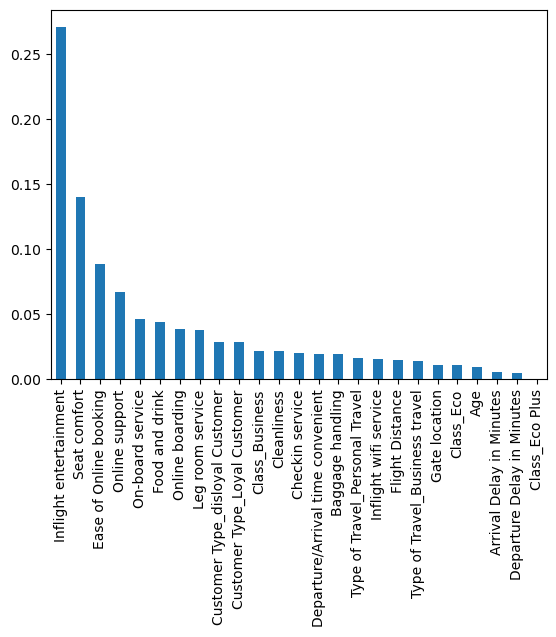

In [64]:
import matplotlib.pyplot as plt
importances = rf_opt.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `predict()` function to make predictions on `X_test` using `rf_opt`. Save the predictions now (for example, as `y_pred`), to use them later for comparing to the true labels. 

</details>

### Obtain performance scores

First, get your precision score.

In [26]:
# Get precision score.

### YOUR CODE HERE ###
pc_test = precision_score(y_test, y_pred, pos_label='satisfied')
print('Precision score: {pc:.3f}'.format(pc = pc_test))

Precision score: 0.950


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `precision_score()` function from `sklearn.metrics`, passing in `y_test` and `y_pred` and specifying the `pos_label` argument as `"satisfied"`.
</details>

Then, collect the recall score.

In [37]:
# Get recall score.

### YOUR CODE HERE ###
rc_test=recall_score(y_test, y_pred, pos_label='satisfied')
print('Recall score: {rc:.3f}'.format(rc = rc_test))


Recall score: 0.945


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `recall_score()` function from `sklearn.metrics`, passing in `y_test` and `y_pred` and specifying the `pos_label` argument as `"satisfied"`.
</details>

Next, obtain your accuracy score.

In [38]:
# Get accuracy score.

### YOUR CODE HERE ###

ac_test = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))

The accuracy score is 0.942


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `accuracy_score()` function from `sklearn.metrics`, passing in `y_test` and `y_pred` and specifying the `pos_label` argument as `"satisfied"`.
</details>

Finally, collect your F1-score.

In [51]:
# Get F1 score.

### YOUR CODE HERE ###

f1_test = f1_score(y_test, y_pred, pos_label = "satisfied")
print("The F1 score is {f1:.3f}".format(f1 = f1_test))

The F1 score is 0.947


Here is a way to gather metric reports fast:

In [55]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, F1-score, and accuracy for your predictions and ground truth labels.
precision = precision_score(y_test, y_pred, pos_label='satisfied')
recall = recall_score(y_test, y_pred, pos_label='satisfied')
f1 = f1_score(y_test, y_pred, pos_label='satisfied')
accuracy = accuracy_score(y_test, y_pred)

# Print the main metrics.
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1-score: {:.3f}".format(f1))
print("Accuracy: {:.3f}".format(accuracy))


Precision: 0.950
Recall: 0.945
F1-score: 0.947
Accuracy: 0.942


In [46]:
from sklearn.metrics import classification_report

# Calculate classification report for your predictions and ground truth labels.
report = classification_report(y_test, y_pred, target_names=["satisfied", "unsatisfied"], digits=3)

# Print the classification report.
print(report)


              precision    recall  f1-score   support

   satisfied      0.933     0.940     0.937     14642
 unsatisfied      0.950     0.945     0.947     17730

    accuracy                          0.942     32372
   macro avg      0.942     0.942     0.942     32372
weighted avg      0.943     0.942     0.942     32372



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `f1_score()` function from `sklearn.metrics`, passing in `y_test` and `y_pred` and specifying the `pos_label` argument as `"satisfied"`.
</details>

**Question:** How is the F1-score calculated?

F1 = 2 * (precision * recall) / (precision + recall)

**Question:** What are the pros and cons of performing the model selection using test data instead of a separate validation dataset?

Pros
+ Less coding work required
+ Data splitting script is shorter
+ You only need to evaluate test data once, rather than twice with validate and test.

Cons
- If you used the samples for both building and testing, the evaluation of metrics may be biased
- It may result to overfitting when applying to the test data.


### Evaluate the model

Now that you have results, evaluate the model. 

**Question:** What are the four basic parameters for evaluating the performance of a classification model?

True Positives, True Negatives wherein predictions are correct. False positives and False negatives where predictions were incorrect.

**Question:**  What do the four scores demonstrate about your model, and how do you calculate them?

- Accuracy (TP+TN / TP+FP+FN+TN): The ratio of correctly predicted observations to total observations. 
 
- Precision (TP / TP+FP): The ratio of correctly predicted positive observations to total predicted positive observations. 

- Recall (Sensitivity, TP / TP+FN): The ratio of correctly predicted positive observations to all observations in actual class.

- F1 score: The harmonic average of precision and recall, which takes into account both false positives and false negatives. 

Calculate the scores: precision score, recall score, accuracy score, F1 score.

In [47]:
# Precision score on test data set.

### YOUR CODE HERE ###

print("\nThe precision score is: {pc:.3f}".format(pc = pc_test), "for the test set,", "\nwhich means of all positive predictions,", "{pc_pct:.1f}% prediction are true positive.".format(pc_pct = pc_test * 100))


The precision score is: 0.950 for the test set, 
which means of all positive predictions, 95.0% prediction are true positive.


In [48]:
# Recall score on test data set.

### YOUR CODE HERE ###
# Recall score on test data set.

### YOUR CODE HERE ###

print("\nThe recall score is: {rc:.3f}".format(rc = rc_test), "for the test set,", "\nwhich means of which means of all real positive cases in test set,", "{rc_pct:.1f}% are  predicted positive.".format(rc_pct = rc_test * 100))


The recall score is: 0.945 for the test set, 
which means of which means of all real positive cases in test set, 94.5% are  predicted positive.


In [58]:
# Accuracy score on test data set.

### YOUR CODE HERE ###

print("\nThe accuracy score is: {ac:.3f}".format(ac = ac_test), "for the test set,", "\nwhich means of all cases in test set,", "{ac_pct:.1f}% are predicted true positive or true negative.".format(ac_pct = ac_test * 100))


The accuracy score is: 0.942 for the test set, 
which means of all cases in test set, 94.2% are predicted true positive or true negative.


In [59]:
# F1 score on test data set.

### YOUR CODE HERE ###

print("\nThe F1 score is: {f1:.3f}".format(f1 = f1_test), "for the test set,", "\nwhich means the test set's harmonic mean is {f1_pct:.1f}%.".format(f1_pct = f1_test * 100))


The F1 score is: 0.947 for the test set, 
which means the test set's harmonic mean is 94.7%.


**Question:** How does this model perform based on the four scores?

In this case, the model performs well according to the 4 performance metrics. The model's precision scores is the highest amount the 3.

### Evaluate the model

Finally, create a table of results that you can use to evaluate the performace of your model.

In [62]:
# Create table of results.

### YOUR CODE HERE ###

table = pd.DataFrame()
table = table.append({'Model': "Tuned Decision Tree",
                        'F1':  0.945422,
                        'Recall': 0.935863,
                        'Precision': 0.955197,
                        'Accuracy': 0.940864
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Tuned Random Forest",
                        'F1':  f1_test,
                        'Recall': rc_test,
                        'Precision': pc_test,
                        'Accuracy': ac_test
                      },
                        ignore_index=True
                    )
table

C:\Users\Levi\AppData\Local\Temp\ipykernel_2984\1400616487.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': "Tuned Decision Tree",
C:\Users\Levi\AppData\Local\Temp\ipykernel_2984\1400616487.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': "Tuned Random Forest",


,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864
1,Tuned Random Forest,0.947306,0.944501,0.950128,0.942450



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Build a table to compare the performance of the models. Create a DataFrame and use the `append()` function to add the results of each model as a new row.

</details>

**Question:** How does the random forest model compare to the decision tree model you built in the previous lab?

In terms of performance, here are the differences:\
F1: Tuned random forest by 0.002\
Recall: Tuned random forest by 0.01\
Precision: Tuned decision tree by 0.005\
Accuracy: Tuned random forest by 0.002


## **Considerations**


**What are the key takeaways from this lab? Consider important steps when building a model, most effective approaches and tools, and overall results.**

- Once again, data cleaning, exploration and engineering are required.
- A separate validation set is typically used for tuning a model instead of just the test set. This avoid bias for the evaluation.
- F1 scores allow to us to consider most metrics in one score. 
- The random forest yields better performances but only by a slight margin. 

**What summary would you provide to stakeholders?**

- The random forest model created was highly effective and has predicted satisfaction with a 94.2% accuracy, 95% precision and 94.5% recall. These scores are slightly better than the single tuned decision tree.
- Similarly, the most predictive features of satisfaction includes: Inflight entertainment, seat comfort and ease of online booking. (recommendations are similar sa the previous report).

### References

[What is the Difference Between Test and Validation Datasets?,  Jason Brownlee](https://machinelearningmastery.com/difference-test-validation-datasets/)

[Decision Trees and Random Forests Neil Liberman](https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged